# 영상 필터

영상 필터링에 대한 개념과 기본적인 구현 방법을 학습한다. 필터(filter)는 무언가를 걸러 내어 일부만 통과시키는 것을 의미한다. 영상 처리에서 필터링이란 영상에서 원하는 정보만 통과시키고 원치 않는 정보를 걸러 내는 작업이다. 예를 들어 영상에서 지저분한 잡음(noise)을 걸러 내거나 부드러운 느낌의 성분을 제거해 영상을 날카로운 느낌이 나도록 만드는 것이다. 영상 처리에서 새로운 영상을 얻기 위해 기존 픽셀 값에 어떠한 연산을 가해서 새로운 픽셀 값을 얻는 작업이다. 새로운 픽셀 값을 얻을 때 기존 픽셀 값 하나가 아닌 그 픽셀과 주변 픽셀들의 값을 활용하는 방법을 공간 영역 필터(spatial domain filter)라고 하며 픽셀 값의 차이를 주파수로 변환해 활용하는 방법을 주파수 영역 필더(frequency domain filter)라고 한다. 

## 컨볼루션과 블러링

공간 영역 필터는 연산 대상 픽셀과 그 주변 픽셀 값을 활용하는데 그 주변 픽셀 중에 어디까지 포함할 것인지 그리고 결과 값을 어떻게 산출할 것인지 결정하는 것이 커널이다. $n \times n$ 크기의 커널(kernel)은 윈도우(window), 필터(filter), 마스크(mask)라고 부르는 작은 크기의 행렬을 이용한다. 커널의 각 요소와 대응하는 입력 픽셀 값을 곱해서 모두 합한 것을 결과 픽셀로 값으로 하고 마지막 픽셀까지 반복하는 것을 컨볼루션 연산이라고 한다. 

<div>
    <img src="https://www.researchgate.net/profile/Zhao-Guyu/publication/335878018/figure/fig2/AS:804323017646081@1568776959511/Convolution-process.png" style="height: 300px;" />
</div>

$3 \times 3$ 크기의 커널로 컨볼루션 연산이다. 하나의 픽셀 값이 결정되면 한 칸 옮겨서 같은 연산을 반복한다. 주변 요소들의 값을 반영하여 새로운 영상을 얻는다. 

영상을 초점이 맞지 않는 것처럼 흐릿하게 만드는 것을 블러링(blurring) 또는 스무딩(smoothing)이라고 한다. 블러링을 적용하는 기본적인 방법은 주변 픽셀 값들의 평균을 적용하는 것이다. 평균 값을 적용한다는 것은 다른 픽셀 값과 비슷한 값을 갖게 하는 것으로 전체적인 영상의 픽셀 값의 차이가 적어져서 이미지는 흐릿해진다. 특정 영역의 픽셀의 평균을 구하는 것은 $\frac{1}{n}$ 값을 커널에 적용해서 컨볼루션하는 것과 같다.

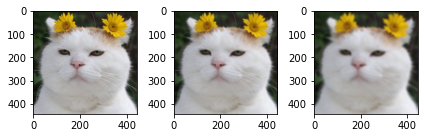

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

kernel = np.array([
    [0.04, 0.04, 0.04, 0.04, 0.04],
    [0.04, 0.04, 0.04, 0.04, 0.04],
    [0.04, 0.04, 0.04, 0.04, 0.04],
    [0.04, 0.04, 0.04, 0.04, 0.04],
    [0.04, 0.04, 0.04, 0.04, 0.04],
])

kernel = np.ones((5, 5)) / 5**2
blured1 = cv2.filter2D(img, -1, kernel)
blured2 = cv2.blur(img, (10, 10))


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
ax1.imshow(img)
ax2.imshow(blured1)
ax3.imshow(blured2)
fig.tight_layout()
plt.show()

## 가우시안 블러링

평균이 아닌 가우시안 분포를 갖는 커널로 블러링하는 것을 가우시안 블러링이라고 한다. 중앙 값이 가장 크고 멀어질수록 값이 작아지는 것이다.

$$
k=\frac{1}{16}
\begin{bmatrix} 
 1 & 2 & 1 \\
 2 & 4 & 2 \\
 1 & 2 & 1
\end{bmatrix}
$$

새로운 픽셀 값을 선정할 때 대상 픽셀에 가까울수록 많은 영향을 주고, 멀어질수록 적은 영향을 주기 때문에 원래 영상과 비슷하면서 노이즈를 제거하는 효과가 있다.

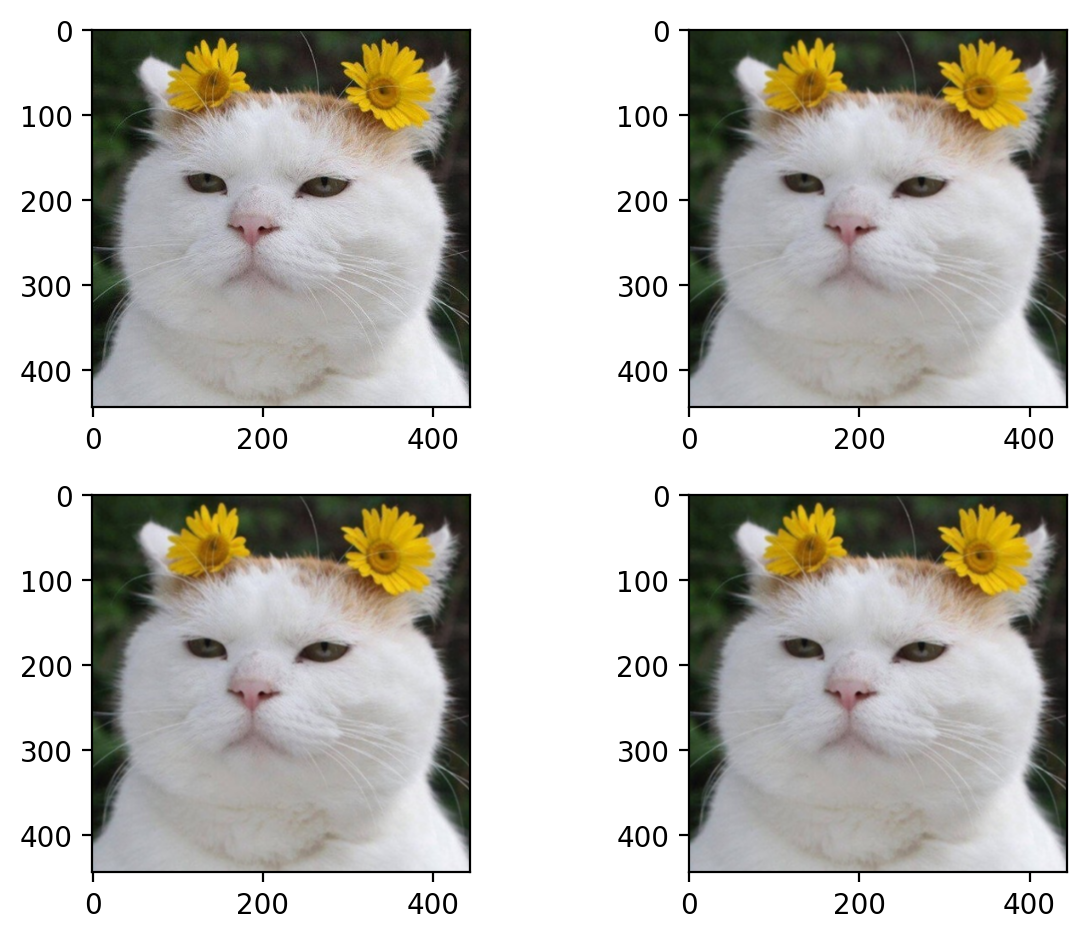

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

kernel1 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) * (1/16)

blured1 = cv2.filter2D(img, -1, kernel1)

kernel2 = cv2.getGaussianKernel(3, 0)
blured2 = cv2.filter2D(img, -1, kernel2*kernel2.T)

blured3 = cv2.GaussianBlur(img, (3, 3), 0)

fig, (axes1, axes2) = plt.subplots(nrows=2, ncols=2, dpi=200)
axes1[0].imshow(img)
axes1[1].imshow(blured1)
axes2[0].imshow(blured2)
axes2[1].imshow(blured3)
fig.tight_layout()
plt.show()

In [1]:
def conv2d(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.
    Args:
        image: a numpy array of size [image_height, image_width].
        kernel: a numpy array of size [kernel_height, kernel_width].
    Return:
        a numpy array of size [image_height, image_width] (convolution output).

    https://github.com/ashushekar/image-convolution-from-scratch
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    # convolution output
    output = np.zeros_like(image)

    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))
    image_padded[1:-1, 1:-1] = image

    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y, x] = (kernel * image_padded[y:y+3, x:x+3]).sum()

    return output

## 미디언 블러링

커널 영역 픽셀 값 중에 중간 값을 대상 픽셀의 값으로 선택하는 것을 미디언(median) 블러링이라고 한다. 미디언 블러링의 필터는 기존 픽셀 값 중에 하나를 선택하므로 기존 값을 재활용한다. 따라서 소금 후추를 뿌린 듯한 잡음 제거에 효과적이다.

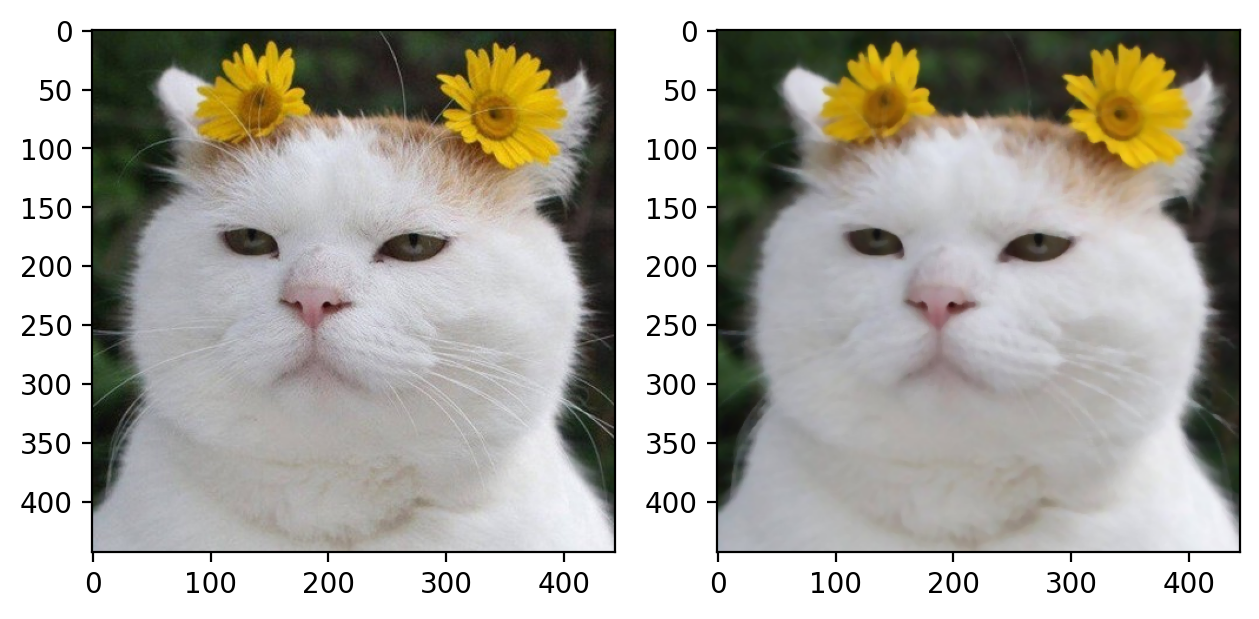

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

blured = cv2.medianBlur(img, 5)

fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=200)
ax1.imshow(img)
ax2.imshow(blured)
fig.tight_layout()
plt.show()

## 바이레터럴 필터

블러링 필터는 잡음을 제거하는 데 효과적이지만 경계(edge)도 흐릿하게 만드는 문제가 있다. 바이레터널(bilateral) 필터는 문제를 개선하기 위해 가우시안 필터와 경계 필터 2개를 사용하는데 그 결과 노이즈는 없애고 경계가 또렷한 영상을 얻을 수 있다.

$$
I^{\text{filtered}}(x)=\frac{1}{W_{p}}\sum_{x_i \in \Omega}I(x_i)f_r(\left\| I(x_i)-I(x) \right\|)g_{s}(\left\| x_i - x \right\|)
$$

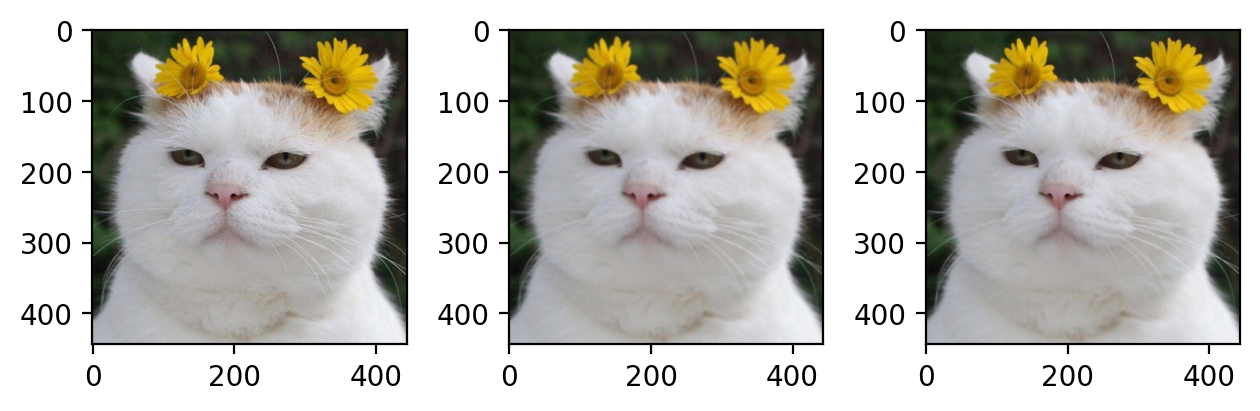

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./img/cat-01.jpg')
img = img[..., ::-1]

blured1 = cv2.GaussianBlur(img, (5, 5), 0)
blured2 = cv2.bilateralFilter(img, 5, 75, 75)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, dpi=200)
ax1.imshow(img)
ax2.imshow(blured1)
ax3.imshow(blured2)
fig.tight_layout()
plt.show()

## 푸리에 변환

푸리에 변환(Fourier transform)은 프랑스 수학자 Joseph Fourier가 제안한 방법으로 수식은 다음과 같다.

$$
f(x)=\int_{-\infty }^{\infty}F(u)e^{j2\pi ux}du
$$

$$
F(u)=\int_{-\infty }^{\infty}f(x)e^{-j2\pi ux}dx
$$

영상신호에서 푸리에 변환을 적용하기 위해 1차원과 달리 2차원 $x$축과 $y$축 방향의 변화가 동시에 포함된 신호라 인지해야 한다. 따라서 2차원 신호에 대한 푸리에 변환을 정의해야 한다. 
|
$$
f(x,y)=\int_{-\infty }^{\infty}F(u,v)e^{j2\pi (ux+vy)}dudv
$$

$$
F(u,v)=\int_{-\infty }^{\infty}f(x,y)e^{-j2\pi (ux+vy)}dxdy
$$

$F(u,v)$는 $x$축 방향으로 주파수 $u$, $y$축 방향으로 $v$인 주기함수 성분의 계수이다. 영상은 연속(continuous)이 아닌 이산(discrete) 신호이며 한정된 유한(finite) 구간이다. 따라서, 이산 데이터에서 정의된 푸리에 변환은 $W \times H$ 크기의 영상 $f(x,y)$에 대한 이산 푸리에 변환은 다음과 같다. 

$$
f(x,y)=\sum_{u=0}^{W-1}\sum_{v=0}^{H-1}F(u,v)e^{j2\pi (ux/W+vy/H)}
$$

$$
F(u,v)=\frac{1}{WH}\sum_{x=0}^{W-1}\sum_{y=0}^{H-1}f(x,y)e^{-j2\pi (ux/W+vy/H)}
$$


## 위너 필터

위너 필터(Wiener filter)는 위너 디컨벌루션을 사용하여 영상을 디블러 처리하는 방법이다. 영상의 주파수 특성 및 가산성 잡음이 최소한 어느 정도 알려진 경우에는 위너 디컨벌루션을 효과적으로 사용할 수 있다.

최대 신호 대 잡음비(peak signal-to-noise ratio)는 평균 제곱 오차(mean square error)를 사용해 영상 압축 품질을 비교하기 위해 사용하는 평가함수이다. MSE는 압축된 영상과 원본 영상 사이의 누적 제곱 오류를 나타내고 PSNR은 최대 오류의 척도를 나타낸다.

$$
\text{MSE} = \frac{\sum_{M,N}[I_{1}(m,n)-I_{2}(m,n)]^{2}}{M \times N}
$$

$$
\text{PSNR}=10\log_{10}\frac{\text{MAX}_{I}^{2}}{\text{MSE}}
$$

PSNR은 영상 내 신호가 가질 수 있는 최대 신호에 대한 잡음(noise)의 비율이다. 데시벨(db) 단위를 사용하며, PSNR 수치가 높을수록 원본 영상에 비해 손실이 적다.

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from skimage import io, color, data, restoration
from skimage.metrics import peak_signal_noise_ratio


def convolve2d(im, psf, k):
    M, N = im.shape
    freq = fft2(im)
    psf = np.pad(
        psf, 
        (((M-k)//2,(M-k)//2+1), ((N-k)//2,(N-k)//2+1)),
        mode='constant'
    ) # assumption: min(M,N) > k > 0, k odd
    freq_kernel = fft2(ifftshift(psf))
    return np.abs(ifft2(freq * freq_kernel))


def plot_freq_filter(F, title, size=20):
    plt.imshow(
        20*np.log10( 0.01 + np.abs(fftshift(F))),
        cmap='coolwarm'
    )
    plt.title(title, size=size)
    plt.colorbar()

    
def plot_freq_spec_3d(freq, ax):
    Y = np.arange(-freq.shape[0]//2, freq.shape[0] - freq.shape[0]//2)
    X = np.arange(-freq.shape[1]//2, freq.shape[1] - freq.shape[1]//2)
    X, Y = np.meshgrid(X, Y)
    Z = (20*np.log10( 0.01 + fp.fftshift(freq))).real
    surf = ax.plot_surface(
        X, Y, Z, 
        cmap=plt.cm.coolwarm,
        linewidth=0,
        antialiased=True
    )
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


im = color.rgb2gray(io.imread('./img/earth_from_sky.png'))
k = 5
psf = np.ones((k, k)) / k**2
im1 = convolve2d(im, psf, k)
im1 += 0.3 * im.std() * np.random.standard_normal(im.shape)
im2, _ = restoration.unsupervised_wiener(im1, psf)
im3 = restoration.wiener(im1, psf, balance=0.25)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), sharex=True, sharey=True)
plt.gray()
axes[0,0].imshow(im)
axes[0,0].axis('off')
axes[0,0].set_title('Original image', size=20)
axes[0,1].imshow(im1)
axes[0,1].axis('off')
axes[0,1].set_title(f'Noisy blurred image: PSNR={peak_signal_noise_ratio(im, im1):.3f}', size=20)
axes[1,0].imshow(im2)
axes[1,0].axis('off')
axes[1,0].set_title(f'Self tuned Wiener restoration: PSNR={peak_signal_noise_ratio(im, im2):.3f}', size=20)
axes[1,1].imshow(im2)
axes[1,1].axis('off')
axes[1,1].set_title(f'Wiener restoration: PSNR={peak_signal_noise_ratio(im, im3):.3f}', size=20)
fig.tight_layout()
plt.show()

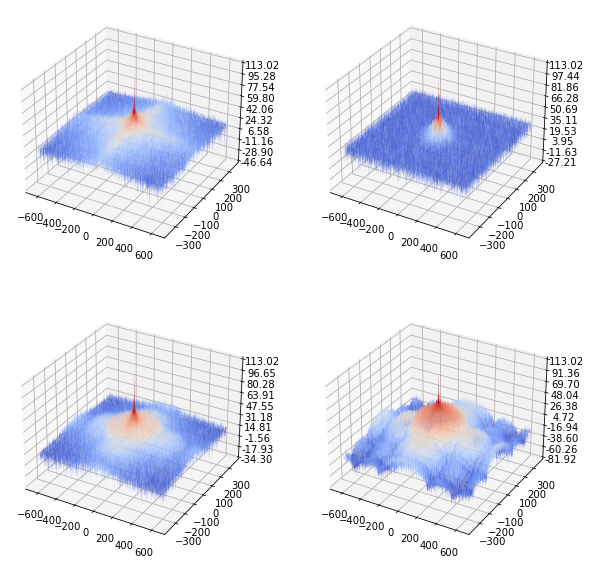

In [58]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    
plot_freq_spec_3d(fp.fft2(im), ax1)
plot_freq_spec_3d(fp.fft2(im1), ax2)
plot_freq_spec_3d(fp.fft2(im2), ax3)
plot_freq_spec_3d(fp.fft2(im3), ax4)
plt.show()

## 제약적 최소 제곱 필터

제약적 최소 제곱(constrained least squares, CLS) 필터는 열화성분 $H$에 따라 다음과 같은 주파수 응답을 가질 수 있다. 

$$
R_{\text{CLS}}(u,v)=\frac{H^{C*}(u,v)}{\left| H^{C*}(u,v) \right|^{2} + \lambda\left| C(u,v) \right|^{2}}
$$

(720, 540)
1.0


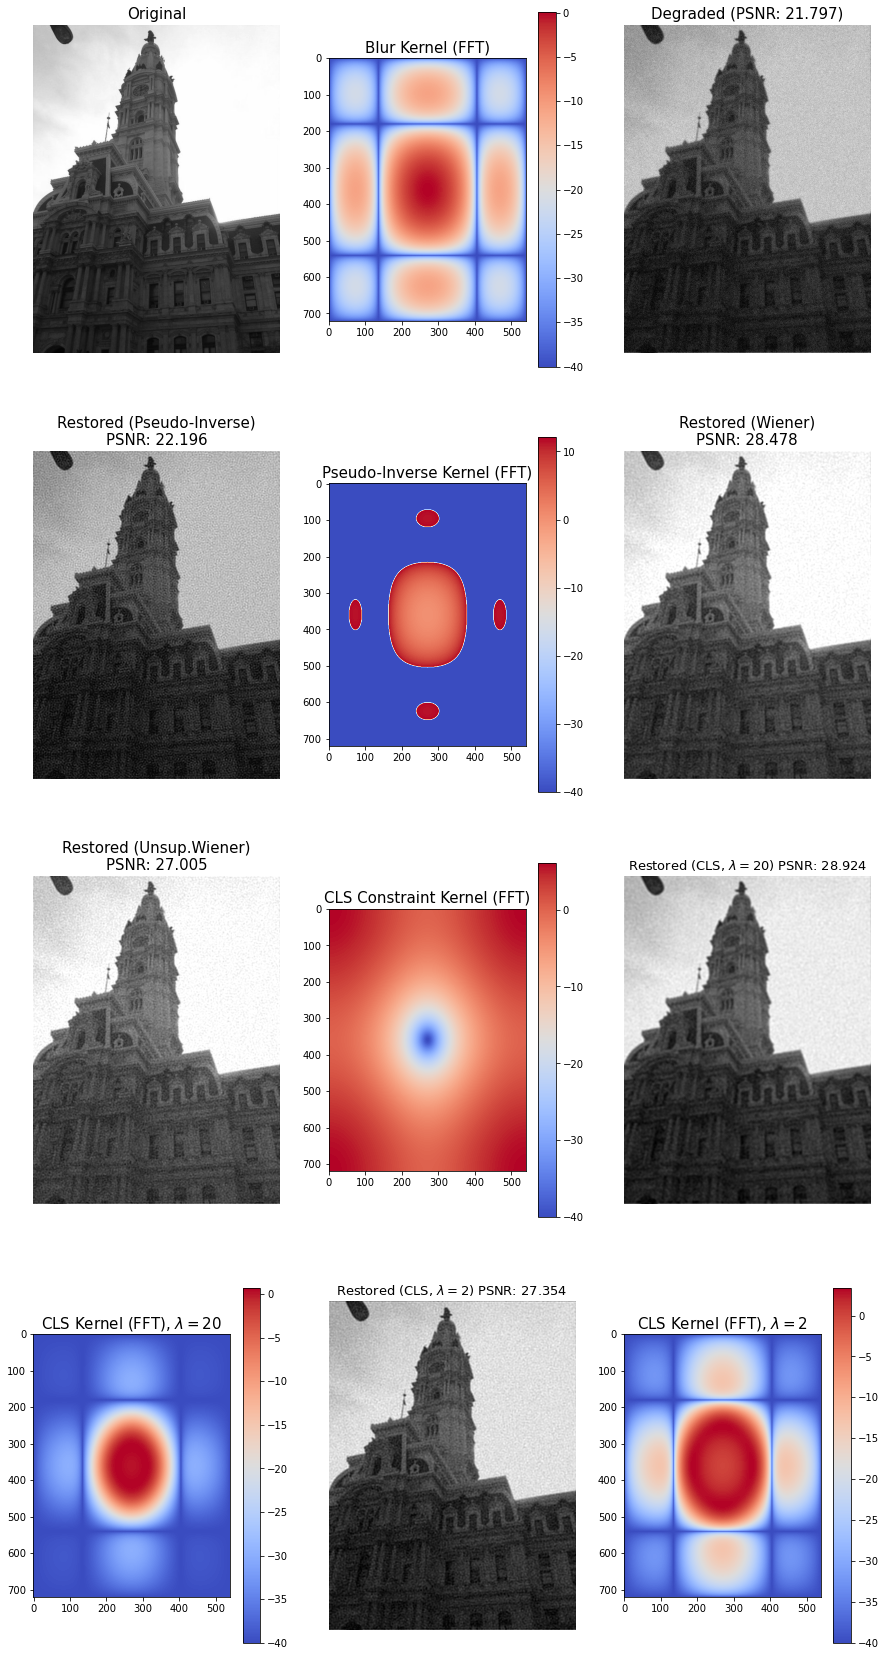

In [60]:
import numpy as np
import scipy.fftpack as fp
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FormatStrFormatter

from skimage.io import imread
from skimage.color import rgb2gray
from skimage.restoration import wiener, unsupervised_wiener
from skimage.metrics import peak_signal_noise_ratio


def pseudo_inverse_filter(y, h, epsilon):
    '''
    Hinv(u,v) = 1/H(u,v)   if |H(u,v)| > epsilon
                0          otherwise
    '''
    Hf = fp.fft2(fp.ifftshift(h))
    M, N = Hf.shape
    Hf[(np.abs(Hf)<epsilon)] = 0
    indices = np.where((np.abs(Hf) >= epsilon))
    Hf[indices] = np.ones((M,N))[indices] / Hf[indices]
    Yf = fp.fft2(y)
    I = Yf * Hf 
    im = np.abs(fp.ifft2(I))
    return (im, Hf)


def cls_filter(y,h,c,lambd):
    Hf = fp.fft2(fp.ifftshift(h))
    Cf = fp.fft2(fp.ifftshift(c))
    Hf = np.conj(Hf) / (Hf*np.conj(Hf) + lambd*Cf*np.conj(Cf))
    #Hf = np.abs(Hf)**2 / (np.abs(Hf)**2 + lambd*np.abs(Cf)**2)
    Yf = fp.fft2(y)
    I = Yf*Hf 
    im = np.abs(fp.ifft2(I))
    return (im, Hf) 


# Input and display the binary image
x = rgb2gray(imread('./img/building.png'))
print(x.shape)
M, N = x.shape
print(np.max(x))

plt.figure(figsize=(15, 30))
plt.subplot(431)
plt.imshow(x, cmap='gray')
plt.axis('off')
plt.title('Original', size=15)

# Blur the image, corrupt the image using WGN and display it
# h is the blurring filter, and sigma is the noise std
h = np.ones((4,4))/16
h = np.pad(h, [(M//2-2, M//2-2), (N//2-2, N//2-2)], mode='constant')
sigma = 0.075
Xf = fp.fft2(x)
Hf = fp.fft2(fp.ifftshift(h))

plt.subplot(432)
plt.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(Hf))), cmap='coolwarm')
plt.title('Blur Kernel (FFT)', size=15)
plt.colorbar()

Y = Hf*Xf
y = fp.ifft2(Y).real + sigma*np.random.normal(size=(M,N))

plt.subplot(433)
plt.imshow(np.abs(y), cmap='gray')
plt.axis('off')
plt.title(f'Degraded (PSNR: {np.round(peak_signal_noise_ratio(x, y),3)})', size=15)

# restoration using inverse filtering
epsilon = 0.25
pix, F_pseudo = pseudo_inverse_filter(y, h, epsilon)
plt.subplot(434)
plt.imshow(pix, cmap='gray')
plt.axis('off'), plt.title(f'Restored (Pseudo-Inverse)\nPSNR: {np.round(peak_signal_noise_ratio(x, pix),3)}', size=15)

plt.subplot(435)
plot_freq_filter(F_pseudo, 'Pseudo-Inverse Kernel (FFT)', size=15)

# restoration using wiener filtering
wx = wiener(y, h, balance=0.25)
plt.subplot(436)
plt.imshow(wx, cmap='gray')
plt.axis('off')
plt.title(f'Restored (Wiener)\nPSNR: {np.round(peak_signal_noise_ratio(x, wx), 3)}', size=15)

# restoration using unsupervised wiener filtering
uwx, _ = unsupervised_wiener(y, h)
plt.subplot(437)
plt.imshow(uwx, cmap='gray')
plt.axis('off')
plt.title(f'Restored (Unsup.Wiener)\nPSNR: {np.round(peak_signal_noise_ratio(x, uwx), 3)}', size=15)

# restoration using cls filtering
c =  np.array([[0,1/4,0], [1/4,-1,1/4],[0,1/4,0]])
c = np.pad(c, [(M//2-1, M//2-2), (N//2-2, N//2-1)], mode='constant')
Cf = fp.fft2(fp.ifftshift(c))
plt.subplot(438)
plt.imshow(20*np.log10( 0.01 + np.abs(fp.fftshift(Cf))), cmap='coolwarm')
plt.title('CLS Constraint Kernel (FFT)', size=15), plt.colorbar()
lambd = 20
clx, F_restored = cls_filter(y, h, c, lambd)
plt.subplot(439)
plt.imshow(clx, cmap='gray')
plt.axis('off')
plt.title(f'Restored (CLS, $\lambda=${lambd}) PSNR: {np.round(peak_signal_noise_ratio(x, clx), 3)}', size=13)
plt.subplot(4,3,10), plot_freq_filter(F_restored, r'CLS Kernel (FFT), $\lambda=${}'.format(lambd), size=15)
lambd = 2
clx, F_restored = cls_filter(y, h, c, lambd)
plt.subplot(4,3,11)
plt.imshow(clx, cmap='gray')
plt.axis('off')
plt.title(f'Restored (CLS, $\lambda=${lambd}) PSNR: {np.round(peak_signal_noise_ratio(x, clx),3)}', size=13)
plt.subplot(4,3,12)
plot_freq_filter(F_restored, f'CLS Kernel (FFT), $\lambda=${lambd}', size=15)
plt.show()

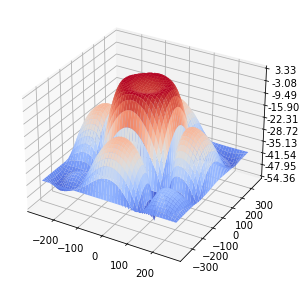

In [63]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

#freq_kernel = np.conj(Hf) / (Hf*np.conj(Hf) + alpha*Cf*np.conj(Cf))
plot_freq_spec_3d(F_restored, ax)

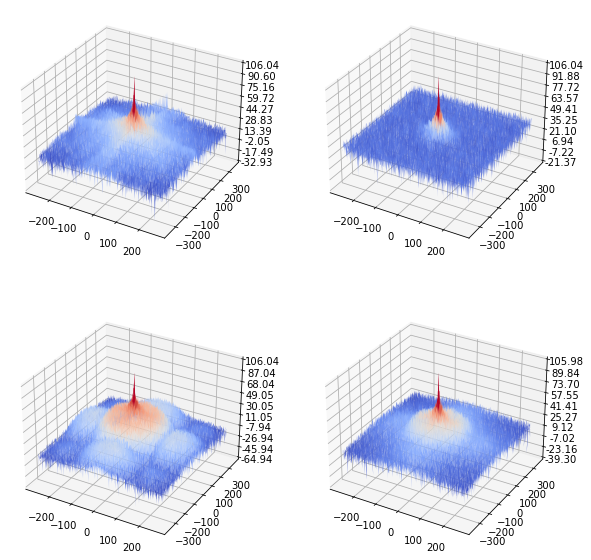

In [62]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
    
plot_freq_spec_3d(fp.fft2(x), ax1)
plot_freq_spec_3d(fp.fft2(y), ax2)
plot_freq_spec_3d(fp.fft2(clx), ax3)
plot_freq_spec_3d(fp.fft2(uwx), ax4)
plt.show()

In [ ]:
from skimage.util import random_noise
from skimage.color import rgb2gray
from skimage.io import imread
im = rgb2gray(imread('images/book.png')) # street
(M, N), k = im.shape, 81 # a 21 x 21 motion blurred kernel
kernel = np.zeros((k, k))
for i in range(k):
    kernel[i, i] = 1
kernel = kernel / k
#print(kernel)
print(im.shape, kernel.shape)
im_blur = convolve2d(im, kernel, k) #, mode='same')
im_blur = random_noise(im_blur, var=0.0025)

from skimage.restoration import wiener, unsupervised_wiener

def cls_filter(y,h,c,lambd):
    Hf = fp.fft2(fp.ifftshift(h))
    Cf = fp.fft2(fp.ifftshift(c))
    Hf = np.conj(Hf) / (Hf*np.conj(Hf) + lambd*Cf*np.conj(Cf))
    #Hf = np.abs(Hf)**2 / (np.abs(Hf)**2 + lambd*np.abs(Cf)**2)
    Yf = fp.fft2(y)
    I = Yf*Hf 
    im = np.abs(fp.ifft2(I))
    return (im, Hf) 

x = im
y = im_blur
h = kernel

h = np.pad(h, [(M//2-k//2, M//2-k//2-1), (N//2-k//2, N//2-k//2-1)], mode='constant')

# restoration using wiener filtering
wx = wiener(y, h, balance=0.1)
# restoration using cls filtering
c =  np.array([[0,1/4,0],[1/4,-1,1/4],[0,1/4,0]])
c = np.pad(c, [(M//2-1, M//2-2), (N//2-2, N//2-1)], mode='constant')
Cf = fp.fft2(fp.ifftshift(c))
lambd = 7.5
clx, F_restored = cls_filter(y, h, c, lambd)

plt.figure(figsize=(15,20))
plt.gray()
plt.subplots_adjust(0,0,1,1,0.02,0.04)
plt.subplot(221), plt.imshow(im), plt.axis('off'), plt.title('Original Image', size=20)
plt.subplot(222), plt.imshow(im_blur), plt.axis('off'), plt.title('Degraded Image (with Motion-blur + Noise)\nPSNR: {}'.format(np.round(compare_psnr(x, y),3)), size=20)
plt.subplot(223), plt.imshow(wx), plt.axis('off'), plt.title('Restored Image (with Wiener) PSNR: {}'.format(np.round(compare_psnr(x, wx),3)), size=20)
plt.subplot(224), plt.imshow(clx), plt.axis('off'), plt.title(r'Restored Image (with CLS, $\lambda=${}) PSNR: {}'.format(lambd, np.round(compare_psnr(x, clx),3)), size=20)
plt.show()

In [ ]:
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pylab as plt

def plot_image(im, title):
  im = im.copy()
  im[im==-1] = 0
  im[im==1] = 255
  plt.imshow(im), plt.axis('off'), plt.title(title, size=20)

def plot_error(iters, errors):
    plt.figure(figsize=(5,5))
    plt.plot(iters, errors, 'r.-')
    plt.xlabel('Iterations', size=20)
    plt.ylabel('% of Mismatch pixels', size=20)
    plt.title('% Mismatch of Original and Denoised Image', size=20)
    plt.grid()
    plt.show()

def plot_images(orig_image, noisy_image, denoised_image):
    plt.figure(figsize=(15,5))
    plt.gray()
    plt.subplot(131), plot_image(orig_image, 'original image')
    plt.subplot(132), plot_image(noisy_image, 'noisy image')
    plt.subplot(133), plot_image(denoised_image, 'denoised image with MRF')
    plt.tight_layout()
    plt.show()
    
# preprocessing step
def read_image_and_binarize(image_file, threshold=128):
  im = (255*rgb2gray(plt.imread(image_file))).astype(int)
  im[im < threshold] = -1
  im[im >= threshold] = 1
  return im

def add_noise(im):
  im_noisy = im.copy()
  for i in range(im_noisy.shape[0]):
    for j in range(im_noisy.shape[1]):
      r = np.random.rand()
      if r < 0.1:
        im_noisy[i][j] = -im_noisy[i][j]
  return im_noisy

def compute_energy_helper(Y, i, j):
  try:
    return Y[i][j]
  except IndexError:
    return 0

def compute_energy(X, Y, i, j, zeta, eta, Y_i_j):
  energy = -eta * X[i][j] * Y_i_j #np.sum(X*Y) #
  for (k, l) in [(-1,0),(1,0),(0,-1),(0,1)]:
      energy -= zeta * Y_i_j * compute_energy_helper(Y, i+k, j+l)
  return energy

def denoise_image(O, X, zeta, eta):
  m, n = np.shape(X)
  Y = np.copy(X)
  max_iter = 10*m*n
  iters = []
  errors = []
  for iter in range(max_iter):
    # randomly pick a location
    i = np.random.randint(m)
    j = np.random.randint(n)
    # compute energies for Y_ij = +1 and -1
    energy_neg = compute_energy(X, Y, i, j, zeta, eta, -1)
    energy_pos = compute_energy(X, Y, i, j, zeta, eta, 1)
    # assign Y_ij to the value with min energy
    if energy_neg < energy_pos:
      Y[i][j] = -1
    else:
      Y[i][j] = 1
    if iter % 100000 == 0:
        print ('Completed', iter, 'iterations out of', max_iter)
        error = get_mismatched_percentage(O, Y)
        iters.append(iter)
        errors.append(error)
  plot_error(iters, errors)
  
  return Y

def get_mismatched_percentage(orig_image, denoised_image):
  diff = (orig_image != denoised_image)
  return (100.0 * np.sum(diff)) / np.size(orig_image)

orig_image = read_image_and_binarize('images/cameraman.png')
zeta = 1.5
eta = 2

# add noise
noisy_image = add_noise(orig_image)

# use ICM for denoising
denoised_image = denoise_image(orig_image, noisy_image, zeta, eta)

# print the percentage of mismatched pixels
print ('Percentage of mismatched pixels: ', get_mismatched_percentage(orig_image, denoised_image))

plot_images(orig_image, noisy_image, denoised_image)